 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Apr/2021 10:47:32] "GET / HTTP/1.1" 200 -


processing image C:\Users\Milton\Desktop\Flask API\static\uploads\Vjy_Dent71_11-02-2021.png


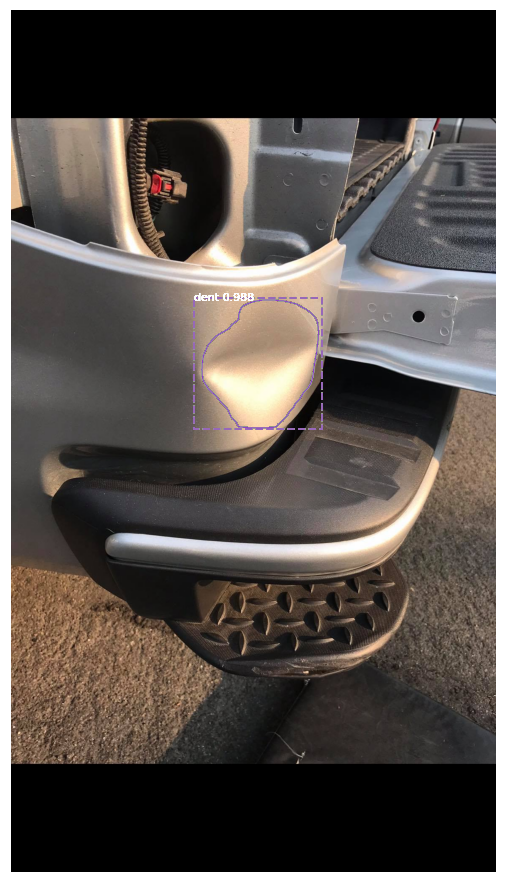

processing image C:\Users\Milton\Desktop\Flask API\static\uploads\Vjy_Scuff141_06-01-2021.jpg


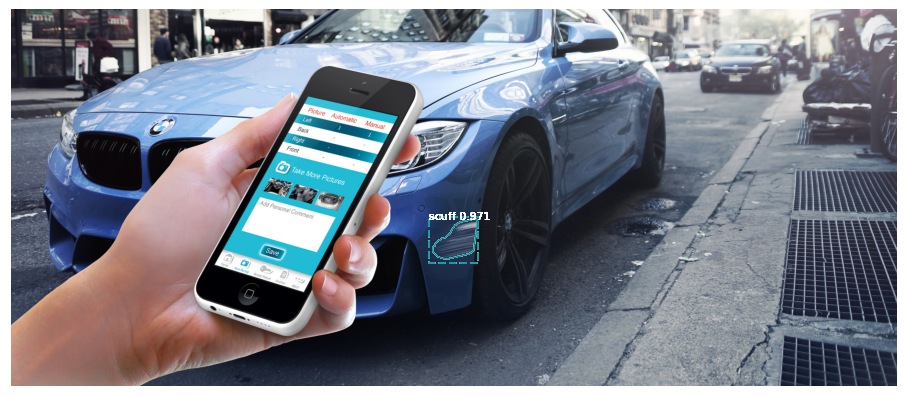

127.0.0.1 - - [13/Apr/2021 10:48:52] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 10:48:52] "GET /display/20210413104801981977.jpg HTTP/1.1" 301 -
127.0.0.1 - - [13/Apr/2021 10:48:52] "GET /display/20210413104832303081.jpg HTTP/1.1" 301 -
127.0.0.1 - - [13/Apr/2021 10:48:52] "GET /static/uploads/20210413104801981977.jpg HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2021 10:48:52] "GET /static/uploads/20210413104832303081.jpg HTTP/1.1" 200 -


In [ ]:
import os
import urllib.request
import damage_prediction as dd
from flask import Flask, flash, request, redirect, url_for, render_template
from werkzeug.utils import secure_filename
from flask import Flask

 

UPLOAD_FOLDER = os.path.join('static', 'uploads')
model_folder_path = r"model"

tflite_model_name = os.path.join(model_folder_path,"mask_rcnn_damages_0076_1.53_VM.tflite")

 

app = Flask(__name__)
app.secret_key = "secret key"
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
app.config['MAX_CONTENT_LENGTH'] = 16 * 1024 * 1024

 

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif'])

 

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS
    
@app.route('/')
def upload_form():
    return render_template('damagedetection.html')

 

@app.route('/', methods=['POST'])
def upload_image():
    if 'files[]' not in request.files:
        flash('No file part')
        return redirect(request.url)
    files = request.files.getlist('files[]')
    file_names = []
    for file in files:
        if file and allowed_file(file.filename):
            filename = secure_filename(file.filename)
            file_names.append(filename)
            file.save(os.path.join(app.config['UPLOAD_FOLDER'], filename))
    
    path = os.path.join(os.getcwd(), UPLOAD_FOLDER)
    
    final_path  = dd.driver(model_folder_path, tflite_model_name, path, file_names)
    
    return render_template('damagedetection.html', filenames=final_path)

 

@app.route('/display/<filename>')
def display_image(filename):
    #print('display_image filename: ' + filename)
    return redirect(url_for('static', filename='uploads/' + filename), code=301)

 

if __name__ == "__main__":
    app.run()